In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


no null values
the features required will be annual income and spending score

In [5]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import KMeans
wcss = []

In [7]:
for i in range(1,11):
    Kmean = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    Kmean.fit(X)
    wcss.append(Kmean.inertia_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

checking for suitable number of clusters
using wcss(within clusters sum of squares) -> .inertia_
ploting the elbow graph to get suitable number of clusters

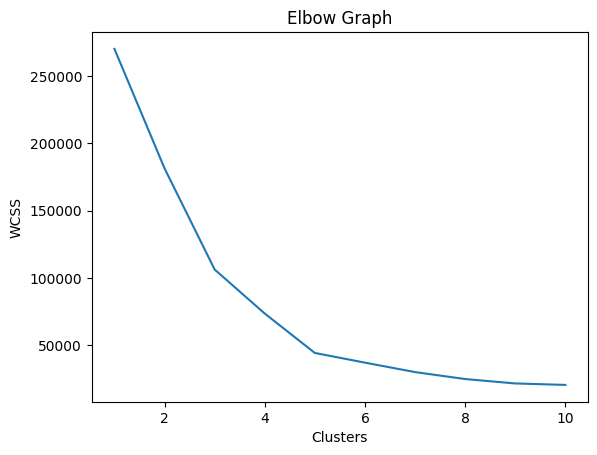

In [8]:
plt.plot(range(1,11) , wcss)
plt.title("Elbow Graph")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
Kmeans_model = KMeans(n_clusters = 5 , random_state = 0 , init = "k-means++")
ymeans = Kmeans_model.fit_predict(X)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


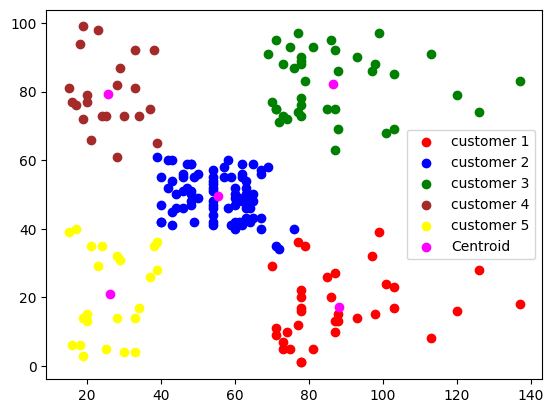

In [10]:
plt.scatter(X[ymeans == 0,0] , X[ymeans == 0,1],c = "red" , label = "customer 1")
plt.scatter(X[ymeans == 1,0] , X[ymeans == 1,1],c = "blue" , label = "customer 2")
plt.scatter(X[ymeans == 2,0] , X[ymeans == 2,1],c = "green" , label = "customer 3")
plt.scatter(X[ymeans == 3,0] , X[ymeans == 3,1],c = "brown" , label = "customer 4")
plt.scatter(X[ymeans == 4,0] , X[ymeans == 4,1],c = "yellow" , label = "customer 5")
plt.scatter(Kmeans_model.cluster_centers_[:,0] , Kmeans_model.cluster_centers_[:,1] , c="magenta" , label = "Centroid")

plt.legend()
plt.show()

In [11]:
Kmeans_model.predict([[15,39]])

array([4])

In [12]:
import joblib
joblib.dump(Kmeans_model, "KMeans_Cluster")

['KMeans_Cluster']

In [13]:
model = joblib.load("KMeans_Cluster")

model.predict([[15,39]])

array([4])